In [15]:
import math 
import pandas_datareader.data as web ## 1..
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime
from yahoofinancials import YahooFinancials
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler ## 3.. rangos de 0 -1
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt ##2...
plt.style.use("fivethirtyeight")


In [18]:
## 1.. llamamos la base de datos desde internet web.DataReader
#urlparse

In [23]:
data = pdr.get_data_yahoo(symbols="AAPL", start=datetime(2012, 1, 1), end=datetime(2020, 11, 24))

In [24]:
#data = urlopen("AAPL", data_source="yahoo", start="2012-01-01", end= "2020-08-9")

In [25]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-18,119.820000,118.000000,118.610001,118.029999,76322100.0,118.029999
2020-11-19,119.059998,116.809998,117.589996,118.639999,74113000.0,118.639999
2020-11-20,118.769997,117.290001,118.639999,117.339996,73391400.0,117.339996
2020-11-23,117.620003,113.750000,117.180000,113.849998,127126400.0,113.849998
2020-11-24,115.849998,112.589996,113.910004,115.169998,111667752.0,115.169998


In [26]:
data.shape

(2240, 6)

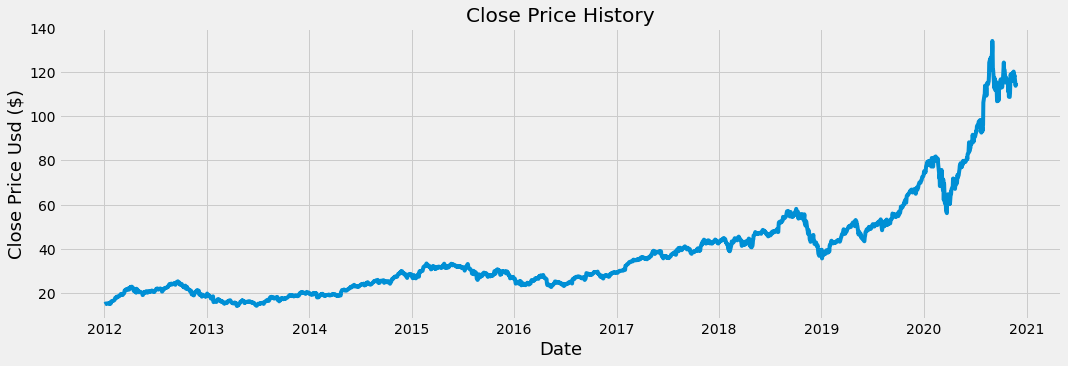

In [27]:
##2...
plt.figure(figsize=(16,5))
plt.title("Close Price History")
plt.plot(data["Close"])
plt.xlabel ("Date", fontsize=18)
plt.ylabel("Close Price Usd ($)", fontsize=18)
plt.show()

In [28]:
## Para obtener el 80% de la base de datos 
data_fil= data.filter(["Close"])
dataset = data_fil.values
training_data_fil_len = math.ceil(len(dataset)* .8)

training_data_fil_len

1792

In [29]:
##3... Se procesan los datos en un rango de 0 - 1 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.85993806],
       [0.83091098],
       [0.84188971]])

In [30]:
## crearemos  un conjunto de datos de entrenamiento
 ##Primero crearemos un conjunto de datos a escala
train_data = scaled_data [0:training_data_fil_len, :]

x_train =[]
y_train =[]

for i in range(60,len(train_data)):## son 60
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print (x_train)
        print (y_train)
        print()
    

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]



In [31]:
##Convertir los X_train y Y_train en matrices Numpy para poder utilizarlas entrenando el modelo  LSTM
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1732, 60, 1)

In [33]:
## Construir el modelo LSTM
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM (50,return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [34]:
## Compilar el modelo
model.compile(optimizer = "adam", loss="mean_squared_error")

In [35]:
model.fit(x_train, y_train, batch_size=10,epochs=10)

Epoch 1/10
174/174 [==============================] - 4s 22ms/step - loss: 9.1394e-04
Epoch 2/10
174/174 [==============================] - 6s 33ms/step - loss: 1.2419e-04
Epoch 3/10
174/174 [==============================] - 4s 22ms/step - loss: 1.0762e-04
Epoch 4/10
174/174 [==============================] - 7s 43ms/step - loss: 8.4854e-05
Epoch 5/10
174/174 [==============================] - 4s 21ms/step - loss: 7.1312e-05
Epoch 6/10
174/174 [==============================] - 6s 35ms/step - loss: 7.2918e-05
Epoch 7/10
174/174 [==============================] - 4s 21ms/step - loss: 6.8610e-05
Epoch 8/10
174/174 [==============================] - 8s 45ms/step - loss: 6.6257e-05
Epoch 9/10
174/174 [==============================] - 6s 34ms/step - loss: 6.0526e-05
Epoch 10/10
174/174 [==============================] - 5s 28ms/step - loss: 5.1695e-05


In [36]:
 ##crearemos el conjunto de datos  testing
test_data =scaled_data[training_data_fil_len - 60:,:]## son 60
#crearemos conjunto de datos x_test y y_tets
x_test = []
y_test = dataset[training_data_fil_len:,:]

for i in range ( 60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [37]:
# convertir el data en una matriz numpy arreglo
x_test =np.array(x_test)

In [38]:
#remodelando el data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1 ))

In [39]:
 #get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [40]:
#get the root mean squared error(RMSE) Using TensorFlow backend.
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.73561920438494

<ipython-input-41-7918d73c239b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["predictions"]= predictions


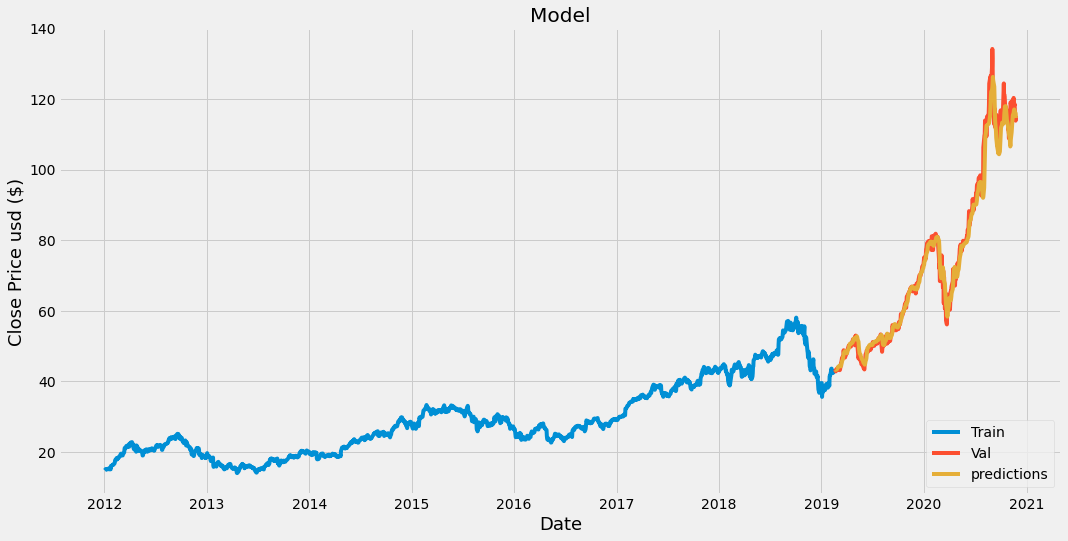

In [41]:
train = data[:training_data_fil_len]
valid = data[training_data_fil_len:]
valid["predictions"]= predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price usd ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","predictions"]])
plt.legend(["Train","Val","predictions"], loc="lower right")
plt.show()

In [42]:
valid

,High,Low,Open,Close,Volume,Adj Close,predictions
Date,,,,,,,
2019-02-19,42.860001,42.372501,42.427502,42.732498,75891200.0,41.578079,43.287968
2019-02-20,43.330002,42.747501,42.797501,43.007500,104457600.0,41.845650,43.212917
2019-02-21,43.092499,42.575001,42.950001,42.764999,68998800.0,41.609699,43.226845
2019-02-22,43.250000,42.845001,42.895000,43.242500,75652800.0,42.074299,43.241188
2019-02-25,43.967499,43.487499,43.540001,43.557499,87493600.0,42.380795,43.343582
...,...,...,...,...,...,...,...
2020-11-18,119.820000,118.000000,118.610001,118.029999,76322100.0,118.029999,117.034798
2020-11-19,119.059998,116.809998,117.589996,118.639999,74113000.0,118.639999,116.844299
2020-11-20,118.769997,117.290001,118.639999,117.339996,73391400.0,117.339996,116.522186


In [43]:
# get the qoute(cotizacion)

new_df = data.filter(["Close"])
last_60_days = new_df[-60:].values## son 60
last_60_days_scaled= scaler.transform(last_60_days)
X_test= []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price= scaler.inverse_transform(pred_price)
print(pred_price)

[[113.384995]]


In [103]:
data_fi = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end= "2020-07-20")

In [42]:
data_fi.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-14,389.019989,375.510010,379.359985,388.230011,42747300.0,388.230011
2020-07-15,396.989990,385.959991,395.959991,390.899994,38299500.0,390.899994
2020-07-16,389.619995,383.619995,386.250000,386.089996,27644400.0,386.089996
2020-07-17,388.589996,383.359985,387.950012,385.309998,23046700.0,385.309998
2020-07-20,394.000000,384.250000,385.670013,393.429993,22531700.0,393.429993
